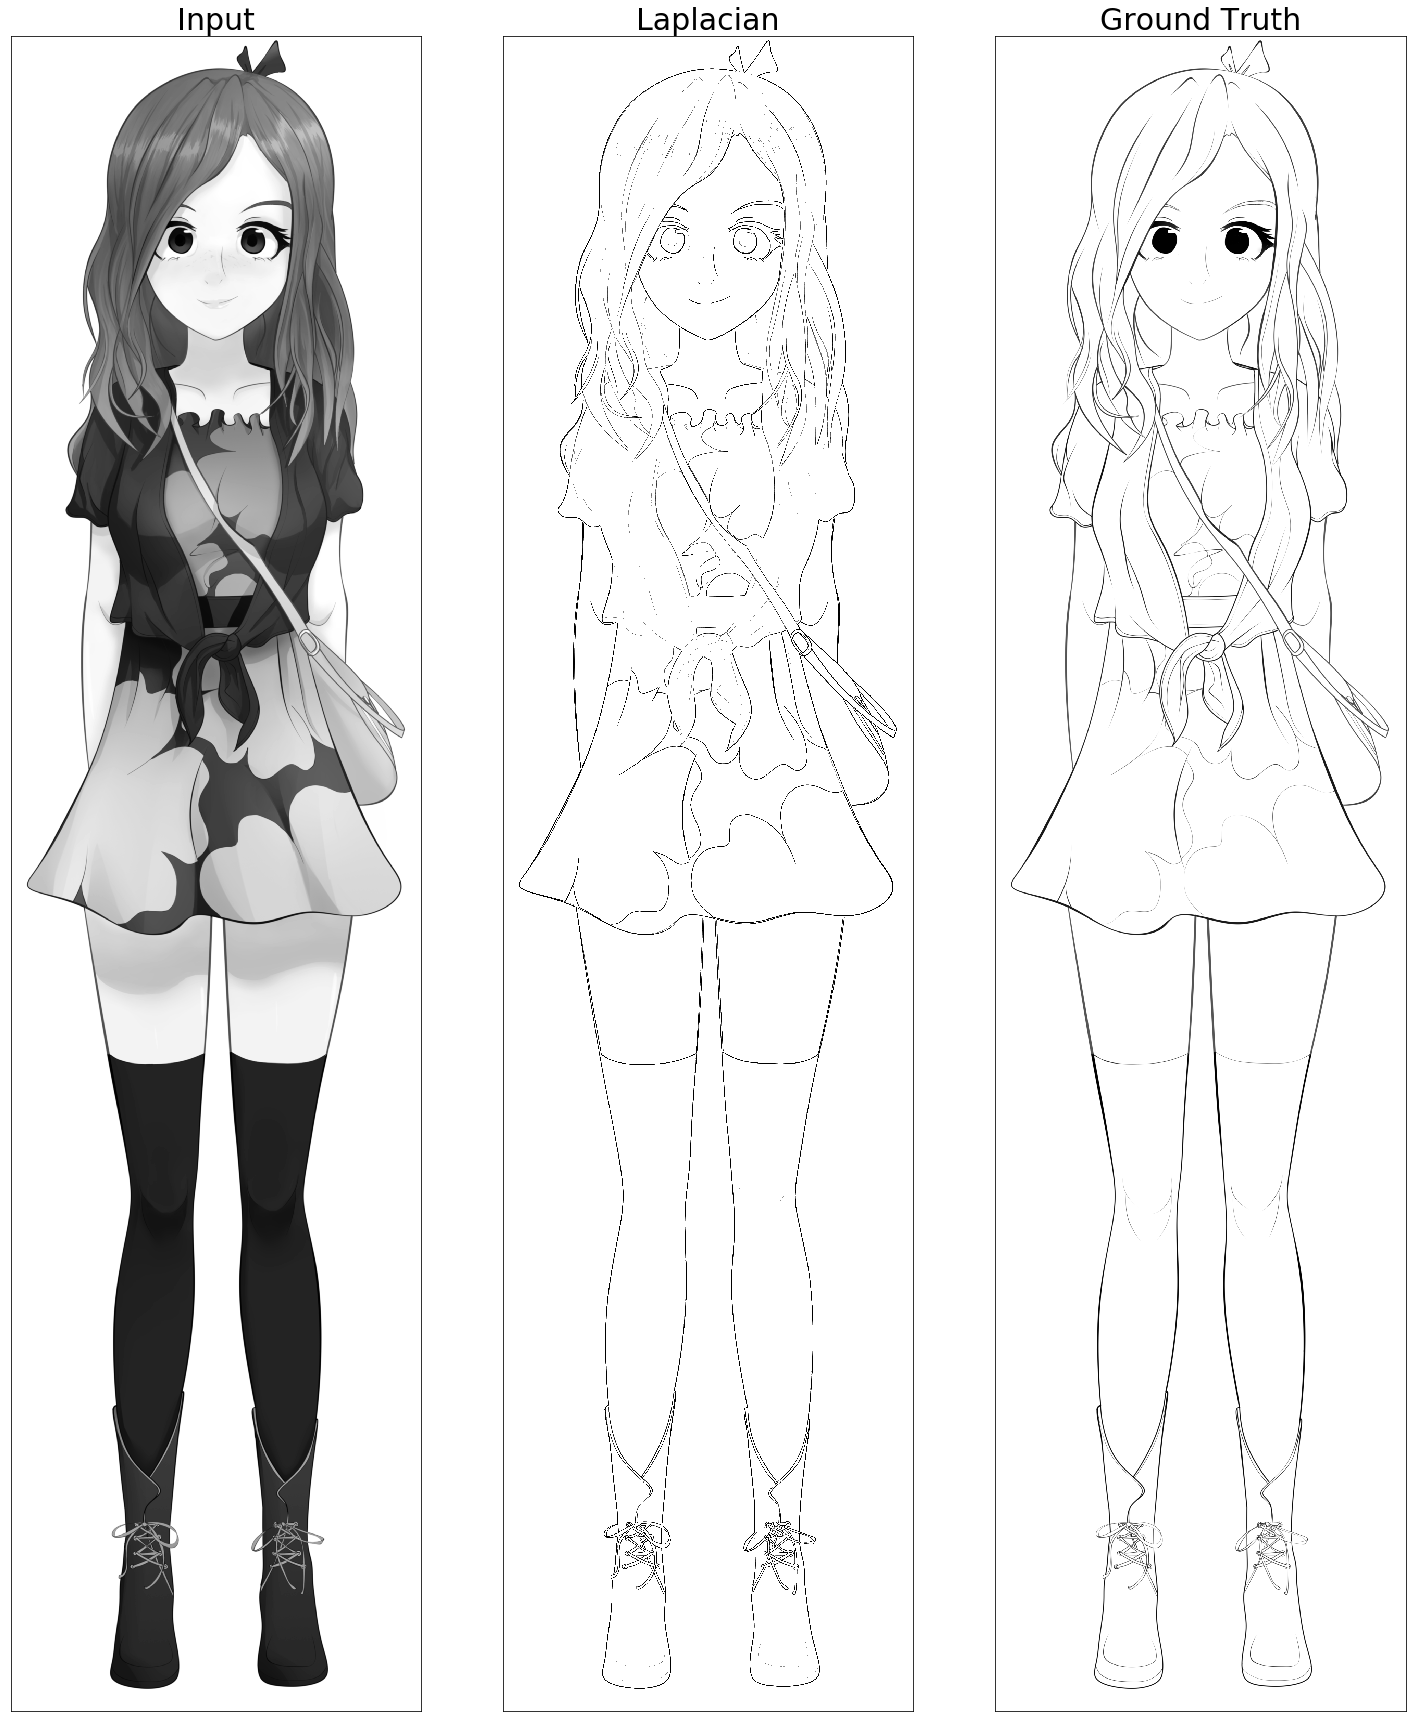

In [24]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

#Variables
bold = 10 #edge multiplier
tol_1 = 255
tol_2 = 255
tol = 100 #minimum darkness tolerance
blur = 3 

# loading image (change the input image accordingly)
img0 = cv2.imread('cassie.png',)
gtruth = cv2.imread('cassie_gt.png',)

# converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

gray = np.clip(gray,0,tol_1)

# remove noise
img = cv2.GaussianBlur(gray,(blur,blur),0)
img = np.clip(img,0,tol_2)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F) * bold
# clip out light lines
laplacian = np.clip(laplacian,tol,255)
# convert all gray areas to white (or black since not yet inverted)
laplacian[laplacian <= tol] = 0
# invert
laplacian =  255 - laplacian
# laplacian = cv2.GaussianBlur(laplacian,(3,3),0)

#print image
cv2.imwrite('laplace.png',laplacian)

plt.figure(figsize=(25,25*img0.shape[0]/img0.shape[1]))
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Input',fontsize=30), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian',fontsize=30), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(gtruth,cmap = 'gray')
plt.title('Ground Truth',fontsize=30), plt.xticks([]), plt.yticks([])

plt.show()

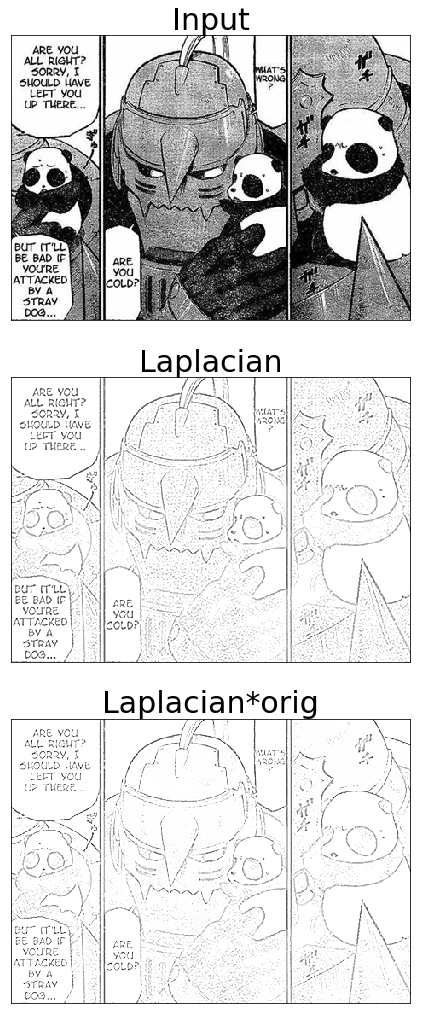

In [157]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

#Variables
# bold = 1 #edge multiplier
tol_1 = 255
tol_2 = 255
tol = 20 #minimum darkness tolerance
blur = 3 

# loading image (change the input image accordingly)
img0 = cv2.imread('al.png',)

# converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

gray = np.clip(gray,0,tol_1)

# remove noise
img = cv2.GaussianBlur(gray,(blur,blur),0)
img = np.clip(img,0,tol_2)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
# laplacian = cv2.GaussianBlur(laplacian,(5,5),0)
bold  = 255/np.max(laplacian)
laplacian = laplacian*bold
# clip out light lines
laplacian = np.clip(laplacian,tol,255)
# convert all gray areas to white (or black since not yet inverted)
laplacian[laplacian <= tol] = 0
# invert
laplacian2 = laplacian
for i in range(0,2):
    laplacian2 = ((255-img0[:,:,0])/255)*laplacian2
    
    laplacian2 *= 255/np.max(laplacian)
    laplacian2 = np.uint8(laplacian2)
    cv2.fastNlMeansDenoising(laplacian2,laplacian2)
    
# laplacian = cv2.GaussianBlur(laplacian,(3,3),0)

laplacian =  255 - laplacian
laplacian2 =  255 - laplacian2

#print image
cv2.imwrite('laplace.png',laplacian2)

plt.figure(figsize=(25,25*img0.shape[0]/img0.shape[1]))
plt.subplot(311),plt.imshow(gray,cmap = 'gray')
plt.title('Input',fontsize=30), plt.xticks([]), plt.yticks([])
plt.subplot(312),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian',fontsize=30), plt.xticks([]), plt.yticks([])
plt.subplot(313),plt.imshow(laplacian2,cmap = 'gray')
plt.title('Laplacian*orig',fontsize=30), plt.xticks([]), plt.yticks([])

plt.show()